Source Separation with Sparsity
===============================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explore local Fourier analysis of sounds, and its
application to source separation from stereo measurements.

In [11]:
from __future__ import division

import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from nt_toolbox.general import *
from nt_toolbox.signal import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Sound Mixing
------------
We load 3 sounds and simulate a stero recording by performing a linear
blending of the sounds.

Sound loading.

In [2]:
from nt_toolbox.load_sound import *

n = 1024*16
s = 3 #number of sounds
p = 2 #number of micros

x = np.zeros([n,3])
x[:,0] = load_sound("nt_toolbox/data/bird.wav",n)
x[:,1] = load_sound("nt_toolbox/data/female.wav",n)
x[:,2] = load_sound("nt_toolbox/data/male.wav",n)

Normalize the energy of the signals.

In [3]:
x = x/np.tile(np.std(x,0),(n,1))

We mix the sound using a $2\mathrm{x}3$ transformation matrix.
Here the direction are well-spaced, but you can try with more complicated
mixing matrices.

Compute the mixing matrix

In [4]:
theta = np.linspace(0, np.pi, s + 1)[:-1]
theta[0] = .2
M = np.vstack((np.cos(theta), np.sin(theta)))

Compute the mixed sources.

In [5]:
y = np.dot(x,np.transpose(M))

Display of the sounds and their mix.

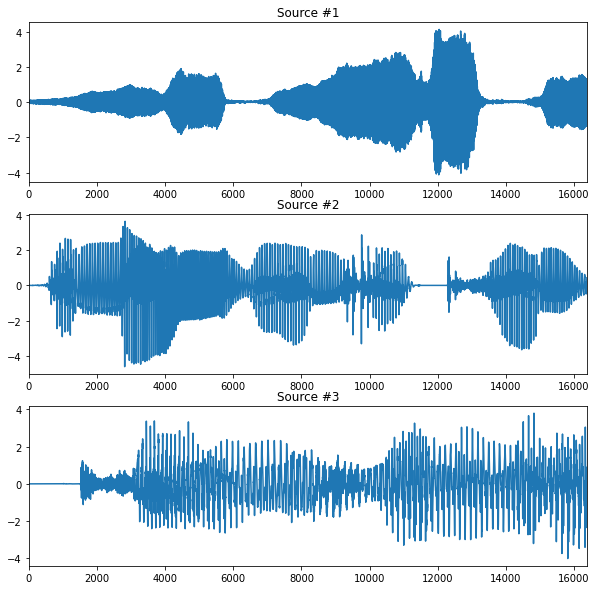

In [6]:
plt.figure(figsize = (10,10))

for i in range(s):
    plt.subplot(s, 1, i+1)
    plt.plot(x[:, i])
    plt.xlim(0,n)
    plt.title("Source #%i" %(i+1))

Display of the micro output.

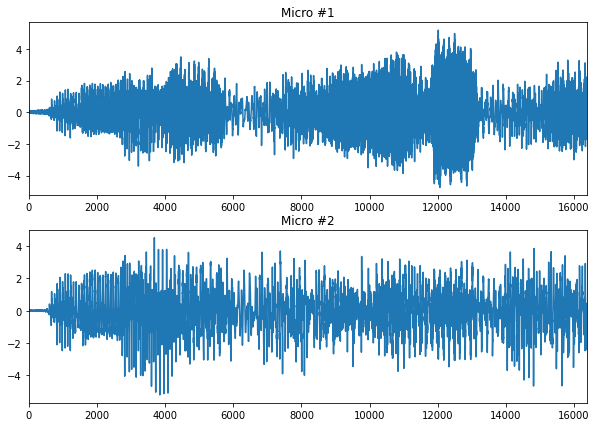

In [7]:
plt.figure(figsize = (10,7))
    
for i in range(p):
    plt.subplot(p, 1, i+1)
    plt.plot(y[:, i])
    plt.xlim(0,n)
    plt.title("Microphone #%i" %(i+1))

Local Fourier analysis of sound.
--------------------------------
In order to perform the separation, one performs a local Fourier analysis
of the sound. The hope is that the sources will be well-separated over
the Fourier domain because the sources are sparse after a STFT.




First set up parameters for the STFT.

In [8]:
w = 128   #size of the window
q = w//4  #overlap of the window

Compute the STFT of the sources.

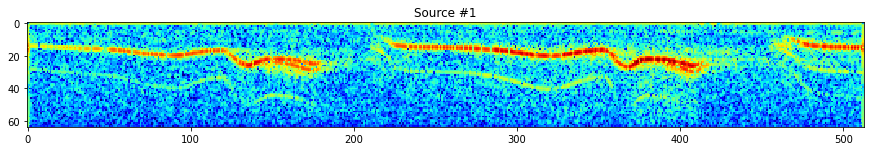

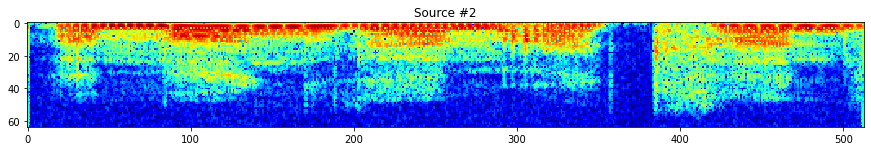

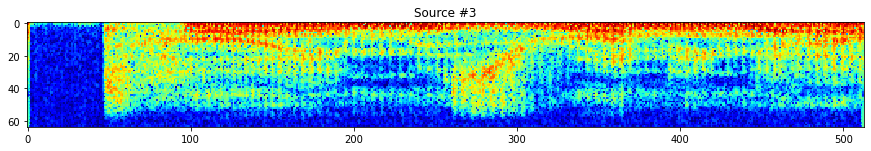

In [12]:
from nt_toolbox.perform_stft import *
from nt_toolbox.plot_spectrogram import *

X = np.zeros([w,4*w+1,s])
Y = np.zeros([w,4*w+1,p])

for i in range(s):
    X[:,:,i] = perform_stft(x[:,i],w,q,n)
    plt.figure(figsize = (15,10))
    plot_spectrogram(X[:,:,i],"Source #%i" %(i+1))

__Exercise 1__

Compute the STFT of the micros, and store them into a matrix |Y|.

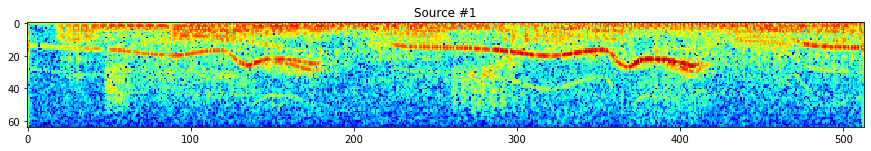

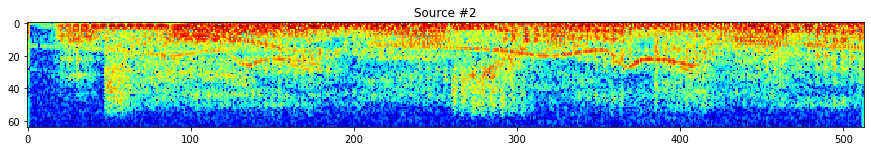

<Figure size 432x288 with 0 Axes>

In [14]:
run -i nt_solutions/audio_2_separation/exo1

In [11]:
## Insert your code here.

Estimation of Mixing Direction by Clustering
--------------------------------------------
Since the sources are quite sparse over the Fourier plane, the directions
are well estimated by looking as the direction emerging from a point
clouds of the transformed coefficients.


First we compute the position of the point cloud.

In [15]:
mf = np.shape(Y)[0]
mt = np.shape(Y)[1]
P = np.reshape(Y, (mt*mf,p))
P = np.vstack((np.real(P), np.imag(P)))

Then we keep only the 5% points with largest energy.


Display some points in the original (spacial) domain.

Number of displayed points.

In [16]:
npts = 6000

Display the original points.

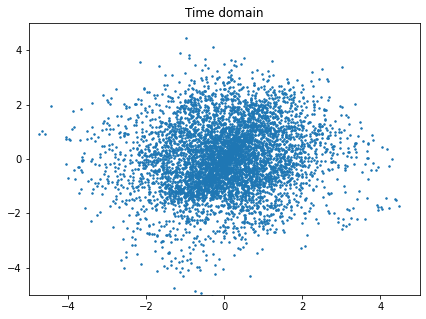

In [17]:
from numpy import random

sel = random.permutation(n)

sel = sel[:npts]

plt.figure(figsize = (7,5))
plt.plot(y[sel,0], y[sel,1], ".", ms = 3)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Time domain')
plt.show()

__Exercise 2__

Display some points of $P$ in the transformed (time/frequency) domain.

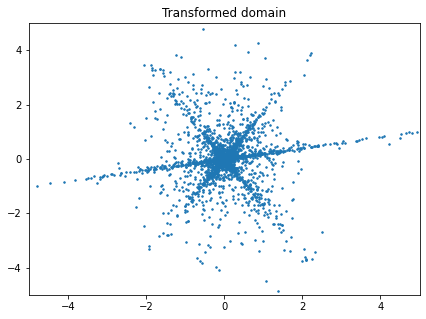

<Figure size 432x288 with 0 Axes>

In [18]:
run -i nt_solutions/audio_2_separation/exo2

In [19]:
## Insert your code here.

We compute the angle associated to each point over the transformed
domain. The histogram shows the main direction of mixing.

In [20]:
import math 

nrow = np.shape(P)[0]
Theta = np.zeros(nrow)
for i in range(nrow):
    Theta[i] = math.atan2(P[i,1],P[i,0])%np.pi

Display histogram.

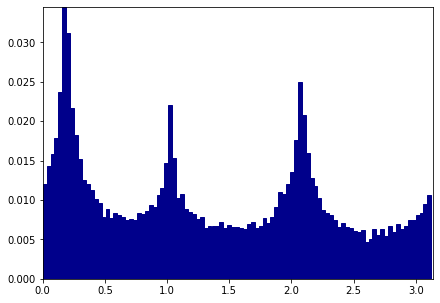

In [21]:
nbins = 100
t = np.linspace(np.pi/200,np.pi,nbins)
hist = np.histogram(Theta,t)
h = hist[0]/np.sum(hist[0])
t = t[:-1]

plt.figure(figsize = (7,5))
plt.bar(t, h, width = np.pi/nbins, color = "darkblue", edgecolor = "darkblue")
plt.xlim(0,np.pi)
plt.ylim(0,np.max(h))
plt.show()

__Exercise 3__

The histogram computed from the whole set of points are not peacked
enough. To stabilize the detection of mixing direction, compute an
histogram from a reduced set of point that have the largest amplitude.
Compute the energy of each point. Extract only a small sub-set.

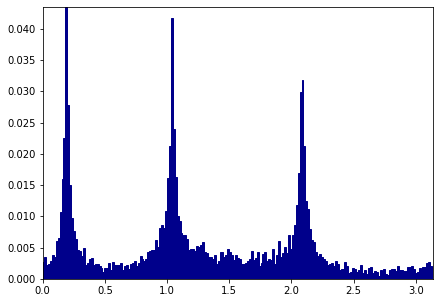

<Figure size 432x288 with 0 Axes>

In [22]:
run -i nt_solutions/audio_2_separation/exo3

In [23]:
## Insert your code here.

__Exercise 4__

Detect the direction $M_1$ approximating the true direction $M$ by
looking at the local maxima of the histogram. First detect the set of
local maxima, and then keep only the three largest. Sort in descending order.

In [24]:
run -i nt_solutions/audio_2_separation/exo4

--- M ---
[[ 0.98006658  0.5        -0.5       ]
 [ 0.19866933  0.8660254   0.8660254 ]]
--- M1 ---
[[ 0.98190316  0.50797406 -0.49567393]
 [ 0.18938372  0.86137237  0.8685087 ]]


In [25]:
## Insert your code here.

Separation of the Sources using Clustering
------------------------------------------
Once the mixing direction are known, one can project the sources on the
direction.


We compute the projection of the coefficients Y on each estimated
direction.

In [26]:
A = np.reshape(Y, (mt*mf,p))

Compute the projection of the coefficients on the directions.

In [27]:
C = abs(np.dot(np.transpose(M1),np.transpose(A)))

At each point $x$, the index $I(x)$ is the direction which creates the
largest projection.

$I$ is the index of the closest source.

In [28]:
tmp = np.max(C,0)
I = np.argmax(C,0)
I = np.reshape(I, (mf,mt)) + 1

An additional denoising is achieved by removing small coefficients.

In [29]:
T = .05
D = np.sqrt(np.sum(abs(Y)**2, 2))
I = I*(D > T)

We can display the segmentation of the time frequency plane.

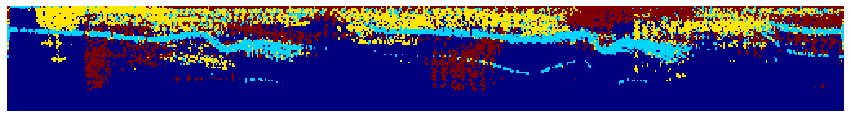

In [30]:
plt.figure(figsize = (15,10))
imageplot(I[:mf//2,:])
plt.imshow(I[:mf//2,:], cmap = plt.get_cmap("jet"), interpolation = "nearest")
plt.show()

The recovered coefficients are obtained by projection.

In [31]:
Proj = np.dot(np.transpose(M1),np.transpose(A))
Xr = np.zeros([w,4*w+1,s])
for i in range(s):
    Xr[:,:,i] = np.reshape(Proj[i,:], (mf,mt))*(I == i)

The estimated signals are obtained by inverting the STFT.

In [32]:
xr = np.zeros([n,s])
for i in range(s):
    xr[:,i] = perform_stft(Xr[:,:,i], w, q, n)

One can display the recovered signals.

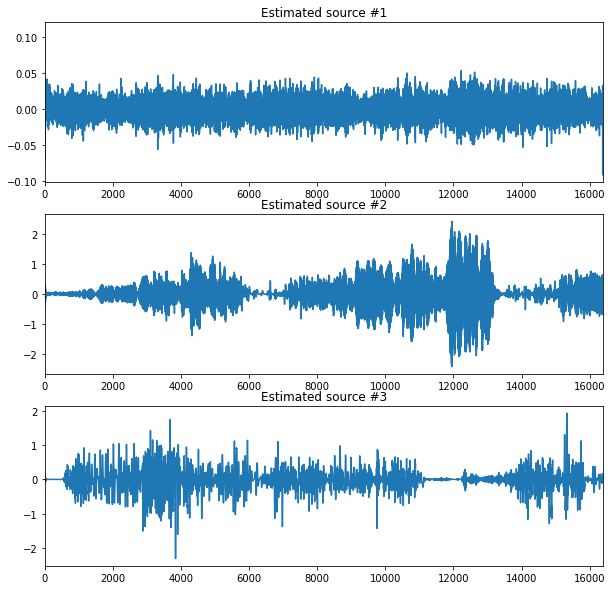

In [33]:
plt.figure(figsize = (10,10))

for i in range(s):
    plt.subplot(s,1,i+1)
    plt.plot(xr[:,i])
    plt.xlim(0,n)
    plt.title("Estimated source #%i" %(i+1))

One can listen to the recovered sources.

In [34]:
i = 1
from IPython.display import Audio
Audio(x[:,i], rate = 15000)

In [35]:
Audio(xr[:,i],rate = 15000)